<a href="https://colab.research.google.com/github/OliverRevilla/Machine-Learning-Python/blob/main/Resumen_Introduccion_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para las 4 preguntas utilizaremos la misma data del link:
link= 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQUIt0M8NAo8HzjEcPXDQ3UheoaHg_4DPzkY_I-1kWT5tXgKlgclViv0nrcpdym2g/pub?gid=1410684387&single=true&output=csv' 

1.   Realizar un modelo clasificador de bayes que determine la predicción de que los aviones del aeropuerto falle:
0: es cuando tiene más de 20 ciclos para que falle
1: es cuando tiene menos de 20 ciclos para que falle.
2.   Realizar un modelo clasificador utilizando PCA y (2 componentes) combinarlo con random forest.
0: es cuando tiene más de 20 ciclos para que falle
1: es cuando tiene menos de 20 ciclos para que falle.
3.   Realizar un modelo clasificador utilizando PCA y (2 componentes) combinarlo con XGBoost.
0: es cuando tiene más de 20 ciclos para que falle
1: es cuando tiene menos de 20 ciclos para que falle.
4.   Realizar un modelo clasificador utilizando redes neuronales tipo perceptrón multicapa.
0: es cuando tiene más de 20 ciclos para que falle
1: es cuando tiene menos de 20 ciclos para que falle.


Colgar su entregable en el aula virtual


In [54]:
# Imprtando las librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import plot_confusion_matrix
from sklearn.neural_network import MLPClassifier

In [3]:
link = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQUIt0M8NAo8HzjEcPXDQ3UheoaHg_4DPzkY_I-1kWT5tXgKlgclViv0nrcpdym2g/pub?gid=1410684387&single=true&output=csv'
dataset = pd.read_csv(link, sep = ",")
dataset.head()

,Activo_id,ciclo,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,max_ciclo
0,1,1,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190,192
1,1,2,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236,192
2,1,3,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442,192
3,1,4,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739,192
4,1,5,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044,192


In [6]:
dataset.shape

(20631, 24)

In [8]:
dataset["Nro de ciclos restantes"] = dataset.max_ciclo - dataset.ciclo
dataset["Objetivo"] = np.where(dataset['Nro de ciclos restantes'] > 20, 0,1)
dataset.head()

,Activo_id,ciclo,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,max_ciclo,Nro de ciclos restantes,Objetivo
0,1,1,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190,192,191,0
1,1,2,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236,192,190,0
2,1,3,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442,192,189,0
3,1,4,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739,192,188,0
4,1,5,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044,192,187,0


In [10]:
# Matriz de características
X = dataset.iloc[:,1:-1].values
Y = dataset.iloc[:,-1].values
print(X.shape, Y.shape)

(20631, 24) (20631,)


In [11]:
# Division en conjuntos de variables 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [13]:
# Escalado de variables
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [16]:
# Aplicando PCA para reducir el número de variables predictoras. 
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test =  pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [17]:
explained_variance

array([0.56327   , 0.12435817])

Algoritmo de Bayes

In [19]:
modelo_clasificacion = GaussianNB()
modelo_clasificacion.fit(X_train, Y_train) 

GaussianNB(priors=None, var_smoothing=1e-09)

In [20]:
# Realizando una predicción
y_pred = modelo_clasificacion.predict(X_test)

In [22]:
# Matriz de confusión
matriz_confusion = confusion_matrix(Y_test,y_pred)
matriz_confusion

array([[3627,   92],
       [  36,  372]])

In [24]:
# Validación K-fol cross
precisiones = cross_val_score(modelo_clasificacion, X_train, Y_train,cv = 10)
print(precisiones.mean())
print(precisiones.std())

0.9667358992713323
0.003841568893626292


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


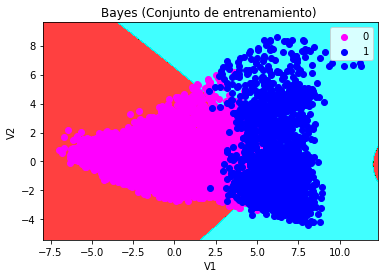

In [27]:
# Visualizando el ajuste del modelo con el conjunto de datos de entrenamiento
X_set, Y_set = X_train, Y_train
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1,stop = X_set[:,0].max()+1,step = 0.01),
                    np.arange(start = X_set[:,1].min()-1,stop = X_set[:,1].max()+1,step = 0.01))
plt.contourf(X1,X2,modelo_clasificacion.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75,cmap = ListedColormap(('red','green','cyan')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(Y_set)):
  plt.scatter(X_set[Y_set == j,0], X_set[Y_set == j,1],
              c = ListedColormap(('magenta','blue','blue'))(i), label = j)
plt.title("Bayes (Conjunto de entrenamiento) ") 
plt.xlabel("V1")
plt.ylabel("V2")
plt.legend()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


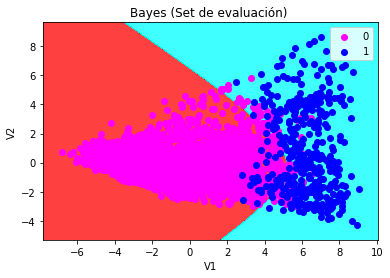

In [28]:
# Visualizando el ajuste del modelo con el conjunto de datos de evaluación
x_set, y_set = X_test, Y_test
x1,x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1,stop = x_set[:,0].max()+1,step = 0.01),
                    np.arange(start = x_set[:,1].min()-1,stop = x_set[:,1].max()+1,step = 0.01))
plt.contourf(x1,x2,modelo_clasificacion.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.75,cmap = ListedColormap(('red','green','cyan')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j,0], x_set[y_set == j,1],
              c = ListedColormap(('magenta','blue','blue'))(i), label = j)
plt.title("Bayes (Set de evaluación) ") 
plt.xlabel("V1")
plt.ylabel("V2")
plt.legend()

In [30]:
precisiones

array([0.9630527 , 0.96486978, 0.9630527 , 0.96668686, 0.97151515,
       0.96424242, 0.97212121, 0.96545455, 0.97333333, 0.9630303 ])

Algoritmo de Random Forest

In [32]:
# Aplicación del modelo
modelo_clasificacion2 = RandomForestClassifier(n_estimators= 100,criterion = 'gini', random_state = 0, max_depth = 15)
modelo_clasificacion2.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [33]:
# Realizando predicciones
y_pred = modelo_clasificacion2.predict(X_test)
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [36]:
# Matriz de confusión
matriz_confusion2 = confusion_matrix(Y_test,y_pred)
matriz_confusion2

array([[3660,   59],
       [  52,  356]])

In [38]:
# Validación K-fol cross
precisiones2 = cross_val_score(modelo_clasificacion2, X_train, Y_train,cv = 10)
print(precisiones2.mean())
print(precisiones2.std())

0.9707953306535984
0.0038752731567179705


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


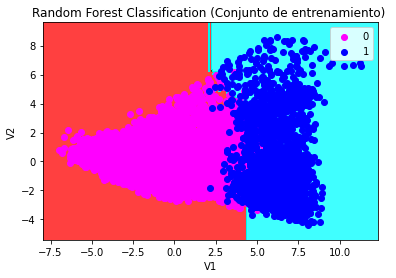

In [34]:
# Visualizando el ajuste del modelo con el conjunto de datos de entrenamiento
X_set, Y_set = X_train, Y_train
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1,stop = X_set[:,0].max()+1,step = 0.01),
                    np.arange(start = X_set[:,1].min()-1,stop = X_set[:,1].max()+1,step = 0.01))
plt.contourf(X1,X2,modelo_clasificacion2.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75,cmap = ListedColormap(('red','green','cyan')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(Y_set)):
  plt.scatter(X_set[Y_set == j,0], X_set[Y_set == j,1],
              c = ListedColormap(('magenta','blue','blue'))(i), label = j)
plt.title("Random Forest Classification (Conjunto de entrenamiento) ") 
plt.xlabel("V1")
plt.ylabel("V2")
plt.legend()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


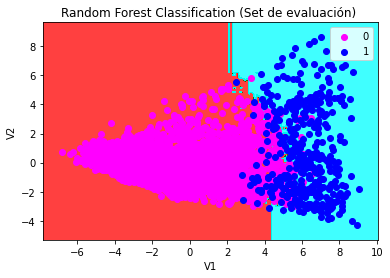

In [35]:
# Visualizando el ajuste del modelo con el conjunto de datos de evaluación
x_set, y_set = X_test, Y_test
x1,x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1,stop = x_set[:,0].max()+1,step = 0.01),
                    np.arange(start = x_set[:,1].min()-1,stop = x_set[:,1].max()+1,step = 0.01))
plt.contourf(x1,x2,modelo_clasificacion2.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.75,cmap = ListedColormap(('red','green','cyan')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j,0], x_set[y_set == j,1],
              c = ListedColormap(('magenta','blue','blue'))(i), label = j)
plt.title("Random Forest Classification (Set de evaluación) ") 
plt.xlabel("V1")
plt.ylabel("V2")
plt.legend()

XGBOOST

In [41]:
# Aplicación del modelo
modelo_clasificacion3 = XGBClassifier()
modelo_clasificacion3.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [42]:
# Realizando predicciones
y_pred3 = modelo_clasificacion3.predict(X_test)

In [44]:
# Elaborando una matriz de confusión
matriz_confusion = confusion_matrix(Y_test,y_pred3)
matriz_confusion

array([[3664,   55],
       [  53,  355]])

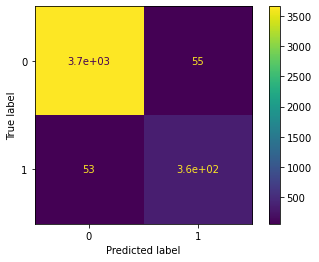

In [46]:
plot_confusion_matrix(modelo_clasificacion3,X = X_test,y_true = Y_test)

In [48]:
# Aplicando K-fold cross validation

precisiones3 = cross_val_score(modelo_clasificacion3,X_train,Y_train,cv = 10)
print(precisiones3.mean())
print(precisiones3.std())

0.9721892333388397
0.004677664758765093


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


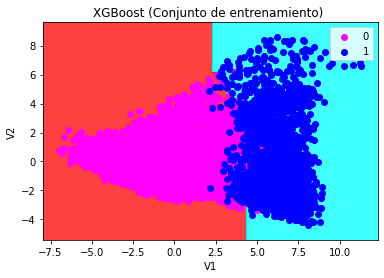

In [51]:
# Visualizando el ajuste del modelo con el conjunto de datos de entrenamiento
X_set, Y_set = X_train, Y_train
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1,stop = X_set[:,0].max()+1,step = 0.01),
                    np.arange(start = X_set[:,1].min()-1,stop = X_set[:,1].max()+1,step = 0.01))
plt.contourf(X1,X2,modelo_clasificacion3.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75,cmap = ListedColormap(('red','green','cyan')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(Y_set)):
  plt.scatter(X_set[Y_set == j,0], X_set[Y_set == j,1],
              c = ListedColormap(('magenta','blue','blue'))(i), label = j)
plt.title("XGBoost (Conjunto de entrenamiento) ") 
plt.xlabel("V1")
plt.ylabel("V2")
plt.legend()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


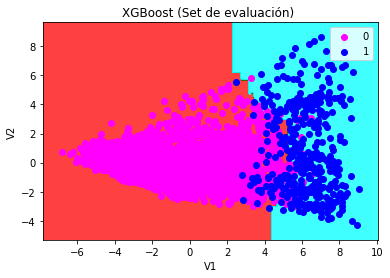

In [52]:
# Visualizando el ajuste del modelo con el conjunto de datos de evaluación
x_set, y_set = X_test, Y_test
x1,x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1,stop = x_set[:,0].max()+1,step = 0.01),
                    np.arange(start = x_set[:,1].min()-1,stop = x_set[:,1].max()+1,step = 0.01))
plt.contourf(x1,x2,modelo_clasificacion3.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.75,cmap = ListedColormap(('red','green','cyan')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j,0], x_set[y_set == j,1],
              c = ListedColormap(('magenta','blue','blue'))(i), label = j)
plt.title("XGBoost (Set de evaluación) ") 
plt.xlabel("V1")
plt.ylabel("V2")
plt.legend()

REDES NEURONALES

In [59]:
while True:
  X_train4, X_test4, y_train4, y_test4 = train_test_split(X, Y)

  modelo_clasificacion4 = MLPClassifier(solver = 'lbfgs', alpha = 1e-5, hidden_layer_sizes = (8,8), random_state = 1)
  modelo_clasificacion4.fit(X_train4,y_train4)

  if modelo_clasificacion4.score(X_train4,y_train4) > 0.9: 
    	break


In [62]:
print(modelo_clasificacion4.score(X_train4,y_train4))

0.9000840173204938


In [73]:
# predicción puntual
y_pred4 = modelo_clasificacion4.predict(X_test4)
y_pred4.shape

(5158,)